# DATA 11800  Fall 2022
# Homework 5: Probability, Sampling and Joins (50 points)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them. 


Homework 5 is due on **Thursday, November 3, at 9:00am**. Late work will not be accepted.  

In [2]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Roulette (12 points)


Suppose you are a casino owner, and your casino runs a [roulette](https://en.wikipedia.org/wiki/Roulette) with 38 pockets: 18 red, 18 black and 2 green: the red and black pockets have numbers associated with them (from 1 to 36) and the green pockets are labeled 0 and 00. If a customer bets $\$$10 on a particular number (for example, number 4), and the ball lands on that number, the customer wins $\$$180 from the casino.  (The initial bet of $\$$10 is returned in addition to the winning payout of $\$$180.)  Any other number causes the player to lose the bet (and the $\$$10 wager).

**Question 1.** Assuming no one is cheating and the roulette is fair,  if a customer plays twice and **bets on numbers**, what is the chance they make money?

In [127]:
# this question asks you to provide a number directly
p_win_num = 1/36
p_gain_after_two_spins = 2*p_win_num
p_gain_after_two_spins

5.0

A certain customer places 40 bets of $\$$10 each on the roulette wheel, betting on single numbers each time, and wins 7 of the bets, winning $\$$930. You suspect that the customer is cheating!  That is, you think that their chance of winning is much higher than the normal chance of winning.

You decide to test your hunch by repeatedly simulating the outcome of 40 games on a fair roulette wheel and comparing to your customer's performance.

**Question 2.** Write a function called `simulate`.  It should take as argument the number of games/spins.  It should return the number of wins in those games simulated under the assumption that the result of each game is sampled from a fair roulette and the bet is on a number.

In [92]:
#code here
def simulate(n_spins):
    successes = 0
    for i in range(n_spins):
        choice = np.random.choice(36,1)+1
        spin = np.random.choice(36,1)+1
        if(choice == spin):
            successes+=1
    return successes
simulate(40)
    

3

**Question 3.**  Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the number of wins in 40 games (again, the bets are on numbers).

Text(0.5, 1.0, 'Distribution of wins in 40 Games')

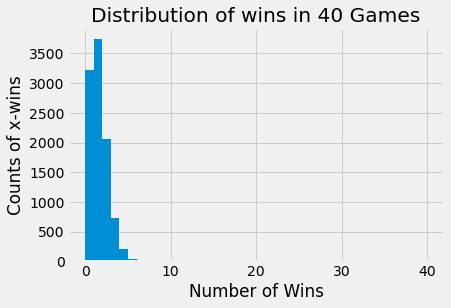

In [96]:
# solution here
outcomes = np.array([])
n_sims = 10000
for i in range(0,n_sims):
    outcomes = np.append(outcomes, simulate(40))
    
# Hist details
bins = np.arange(0,41)
plt.hist(outcomes,bins)
plt.xlabel('Number of Wins')
plt.ylabel('Counts of x-wins')
plt.title('Distribution of Wins in 40 Games')

**Question 4.** In the cell below, calculate the proportion of simulations for which you get 7 wins or more. Do your simulations suggest that the customer is cheating?

The proportion of simulations for which you get 7 wins or more is 1/10000, suggesting that the chance of having this happen is extremely low. It is likely taht the customer is cheating. 

In [110]:
# calculation here
seven_or_more = np.count_nonzero(outcomes[outcomes >= 7])
seven_or_more


1

**Question 5.**  Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the net winnings/gain in 40 games (in each simulation of 40 games, you can calculate the net gain, which can be negative). Using the results of your 10,000 trial simulation, estimate the expected gain in 40 games.

The expected gain in 40 Games based on the simulation is: -188.53


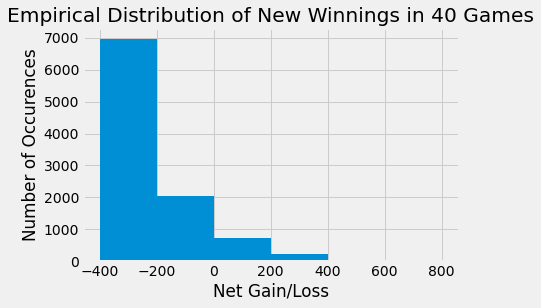

In [128]:
# code here
outcomes_2 = np.array([])
for i in range(0,n_sims):
    outcomes_2 = np.append(outcomes_2,-400+190*simulate(40))

bins = np.arange(-400,1000, 200)
plt.hist(outcomes_2, bins)
plt.xlabel('Net Gain/Loss')
plt.ylabel('Number of Occurences')
plt.title('Empirical Distribution of New Winnings in 40 Games')
print('The expected gain in 40 Games based on the simulation is:', np.mean(outcomes_2))

## 2.  Sampling the 311 calls database (15 points)

This database is a subset of the City of Chicago "311 Service Requests" dataset,  downloaded from the City of Chicago Data Portal.  It contains the logs of more than 152,000 calls to the City of Chicago non-emergency hotline in January 2020.  

https://data.cityofchicago.org/Service-Requests/311-Service-Requests/v6vf-nfxy


In [135]:
calls = pd.read_csv("311_Service_Requests_Jan2020.csv")
print(calls.shape)
calls.head()


(152217, 37)


C:\Users\ja123\AppData\Local\Temp\ipykernel_26080\1338435027.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  calls = pd.read_csv("311_Service_Requests_Jan2020.csv")


,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,OWNER_DEPARTMENT,STATUS,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,CITY,...,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,SR20-03333992,Traffic Signal Out Complaint,SFB,CDOT - Department of Transportation,Completed,1/16/20 6:10,1/16/20 10:32,1/16/20 9:31,NaN,NaN,...,NaN,NaN,6,5,1,NaN,NaN,NaN,NaN,NaN
1,SR20-03334532,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,1/16/20 8:42,1/16/20 13:31,1/16/20 8:42,NaN,NaN,...,NaN,NaN,8,5,1,NaN,NaN,NaN,NaN,NaN
2,SR20-03335498,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,1/16/20 10:24,1/16/20 14:31,1/16/20 10:24,NaN,NaN,...,NaN,NaN,10,5,1,NaN,NaN,NaN,NaN,NaN
3,SR20-03335462,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,1/16/20 10:23,1/16/20 14:31,1/16/20 10:23,NaN,NaN,...,NaN,NaN,10,5,1,NaN,NaN,NaN,NaN,NaN
4,SR20-03335458,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,1/16/20 10:23,1/16/20 14:31,1/16/20 10:23,NaN,NaN,...,NaN,NaN,10,5,1,NaN,NaN,NaN,NaN,NaN


We are interested in knowing how many calls occur in a handful of categories.  Since some complaints are handled by enforcement personnel (Fly Dumping Complaint, Sanitation Code Violation) and some by maintenance crews (Sign Repair Request,Pothole in Street Complaint,  Tree Trim Request) we want to estimate the breakdown of the complaint volume.

With 150,000 calls per month, we are hesitant to look at the entire database. We want to explore which of our questions can be answered using samples of the database. 

**Question 1.** Create a data frame called `calls1pct` that contains a sample of 1% of the rows of the `calls` data frame.  How many rows does your sample (data frame) have?

In [134]:
# solution here
calls1pct = calls.sample(round(calls.shape[0]/100))
print("Number of rows in sample:", calls1pct.shape[0])

Number of rows in sample: 1522


**Question 2** Using the sample you created, estimate the proportion of calls with SR_TYPE in the following categories:
* Inaccurate Fuel Pump Complaint  
* Ridesharing Complaint
* Restaurant Complaint 
* Alley Light Out Complaint
* Traffic Signal Out Complaint 
* Pavement Cave-In Inspection Request

Using those estimated proportions, what is your prediction for the number of calls (in these categories) for the whole month.

In [141]:
# solution here
num_rows = 152217
fuel_pump = list(calls1pct['SR_TYPE']).count('Inaccurate Fuel Pump Complaint')/1522
print('There is an estimated', fuel_pump*num_rows,'number of calls for Inaccurate Fuel Pump Complaints')
ride_sharing = list(calls1pct['SR_TYPE']).count('Ridesharing Complaint')/1522
print('There is an estimated', ride_sharing*num_rows,'number of calls for Ridesharing Complaints')
restaurant = list(calls1pct['SR_TYPE']).count('Restaurant Complaint')/1522
print('There is an estimated', restaurant*num_rows,'number of calls for Restaurant Complaints')
alley_light = list(calls1pct['SR_TYPE']).count('Alley Light Out Complaint')/1522
print('There is an estimated', alley_light*num_rows,'number of calls for Alley Light Out Complaints')
traffic_signal = list(calls1pct['SR_TYPE']).count('Traffic Signal Out Complaint')/1522
print('There is an estimated', traffic_signal*num_rows,'number of calls for Traffic Signal Out Complaints')
pavement = list(calls1pct['SR_TYPE']).count('Pavement Cave-In Inspection Request')/1522
print('There is an estimated', pavement*num_rows,'number of calls for Pavement Cave-In Inspection Requests')

There is an estimated 0.0 number of calls for Inaccurate Fuel Pump Complaints
There is an estimated 0.0 number of calls for Ridesharing Complaints
There is an estimated 300.0335085413929 number of calls for Restaurant Complaints
There is an estimated 2400.2680683311432 number of calls for Alley Light Out Complaints
There is an estimated 3000.335085413929 number of calls for Traffic Signal Out Complaints
There is an estimated 0.0 number of calls for Pavement Cave-In Inspection Requests


**Question 3**  Find the actual numbers of complaints in the above categories for the entire month and compare to the estimates from the 1/100 sample. Which categories were you able to estimate well, and which  categories are estimated poorly?

In [146]:
# solution here
fuel_pump = list(calls['SR_TYPE']).count('Inaccurate Fuel Pump Complaint')
print('There were', fuel_pump,'calls for Inaccurate Fuel Pump Complaints')
ride_sharing = list(calls['SR_TYPE']).count('Ridesharing Complaint')
print('There were', ride_sharing,'calls for Ridesharing Complaints')
restaurant = list(calls['SR_TYPE']).count('Restaurant Complaint')
print('There were', restaurant,'calls for Restaurant Complaints')
alley_light = list(calls['SR_TYPE']).count('Alley Light Out Complaint')
print('There were', alley_light,'calls for Alley Light Out Complaints')
traffic_signal = list(calls['SR_TYPE']).count('Traffic Signal Out Complaint')
print('There were', traffic_signal,'calls for Traffic Signal Out Complaints')
pavement = list(calls['SR_TYPE']).count('Pavement Cave-In Inspection Request')
print('There were', pavement,'calls for Pavement Cave-In Inspection Requests')
print("The estimations were overall not great (with Alley Light Out Complaints) being the closest\
 to its estimate from the simple random sample. The accuracy seems to be higher for complaints\
 with more calls however.")

There were 6 calls for Inaccurate Fuel Pump Complaints
There were 27 calls for Ridesharing Complaints
There were 223 calls for Restaurant Complaints
There were 2368 calls for Alley Light Out Complaints
There were 2314 calls for Traffic Signal Out Complaints
There were 4 calls for Pavement Cave-In Inspection Requests
The estimations were overall not great (with Alley Light Out Complaints) being the closest to its estimate from the simple random sample. The accuracy seems to be higher for complaints with more calls however.


**Question 4.**  What is the largest category (of all the SR_TYPEs) that is present in the full dataset but is missing entirely from your sample? (In other words, of all the categories with 0 counts in your sample, which one has the largest number of rows in the dataset for the entire month?)

In [207]:
# solution here
main_data = calls.groupby(['SR_TYPE']).count()
sim_data = calls1pct.groupby(['SR_TYPE']).count()
main_data['Sim_Count'] = sim_data['SR_NUMBER']
columns = ['SR_NUMBER','Sim_Count']
main_data[columns]
not_in_sim = main_data[pd.isna(main_data['Sim_Count'])].sort_values('SR_NUMBER', ascending = False)
not_in_sim.iloc[0].name

'Tree Planting Request'

**Question 5**. What is the smallest nonzero number of counts for SR_TYPE categories in your sample?  How many categories have this count number?  How many rows do these categories have in the full dataset?

In [251]:
# solution here
sim_sorted = sim_data.sort_values('SR_NUMBER')
count = np.count_nonzero(sim_data['SR_NUMBER']==1)
print("The smallest nonzero number of counts for SR_TYPE in the sample is:", sim_sorted['SR_NUMBER'][0])
print(count,'categories have this count number')
print("The counts for those rows in the main data set are as follows:")
for i in range(0,count):
    name = sim_sorted.iloc[i].name
    print('-   ',name, ':', main_data.loc[name]['SR_NUMBER'])

The smallest nonzero number of counts for SR_TYPE in the sample is: 1
11 categories have this count number
The counts for those rows in the main data set are as follows:
-    Public Vehicle/Valet Complaint : 31.0
-    Water Quality Concern : 61.0
-    Tobacco - General Complaint : 23.0
-    Sign Repair Request - One Way Sign : 160.0
-    Sidewalk Cafe Complaint : 13.0
-    Low Water Pressure Complaint : 126.0
-    Liquor Establishment Complaint : 30.0
-    Dead Bird : 11.0
-    Consumer Fraud Complaint : 110.0
-    Yard Waste Pick-Up Request : 136.0
-    City Vehicle Sticker Violation : 94.0


The smallest nonzero number of counts for SR_TYPE in the sample is: 1\
11 categories have this count number\
The counts for those rows in the main data set are as follows:
- Public Vehicle/Valet Complaint : 31.0
- Water Quality Concern : 61.0
- Tobacco - General Complaint : 23.0
- Sign Repair Request - One Way Sign : 160.0
- Sidewalk Cafe Complaint : 13.0
- Low Water Pressure Complaint : 126.0
- Liquor Establishment Complaint : 30.0
- Dead Bird : 11.0
- Consumer Fraud Complaint : 110.0
- Yard Waste Pick-Up Request : 136.0
- City Vehicle Sticker Violation : 94.0

## 3. Causes of Death by Year (23 points)


This exercise is designed to give you practice working with dataframes `pivot_table()` and `merge()`. 

We'll be looking at a dataset from the California Department of Public Health that records the cause of death, as recorded on a death certificate, for everyone who died in California from 1999 to 2013.  The data is in the file `causes_of_death.csv.zip`. Each row records the number of deaths by a specific cause in one year in one ZIP code.

To make the file smaller, we've compressed it; run the next cell to unzip and load it.

In [227]:
!unzip -o causes_of_death.csv.zip
causes = pd.read_csv('causes_of_death.csv')
causes.head()

'unzip' is not recognized as an internal or external command,
operable program or batch file.


,Year,ZIP Code,Cause of Death,Count,Location
0,1999,90002,SUI,1,"(33.94969, -118.246213)"
1,1999,90005,HOM,1,"(34.058508, -118.301197)"
2,1999,90006,ALZ,1,"(34.049323, -118.291687)"
3,1999,90007,ALZ,1,"(34.029442, -118.287095)"
4,1999,90009,DIA,1,"(33.9452, -118.3832)"


**Question 1 (5 points)** Create a dataframe with two columns, one for Cause of Death and the other contaning a count of the total number of deaths in the dataset due to that cause.  Call the dataframe `cause_count`.

*Hint 1:* If all of your causes have the exact same count, then you probably have done something wrong.

*Hint 2:* You may need to use reset_index() to get a column named "Cause of Death" rather than it being the index.

In [246]:
#replace the ...
cause_count = pd.pivot_table(causes,index=['Cause of Death'],values=['Count'],aggfunc = np.sum).reset_index()
cause_count

,Cause of Death,Count
0,ALZ,111178
1,CAN,822906
2,CLD,194961
3,DIA,106960
4,HOM,21336
5,HTD,957108
6,HYP,41251
7,INJ,157313
8,LIV,60526
9,NEP,14338


The causes of death in the data are abbreviated.  We've provided a file called `abbreviations.csv` to decode the abbreviations.

In [247]:
abbreviations = pd.read_csv('abbreviations.csv')
abbreviations

,Cause of Death,Cause of Death (Full Description)
0,AID,Acquired Immune Deficiency Syndrome (AIDS)
1,ALZ,Alzheimer's Disease
2,CAN,Malignant Neoplasms (Cancers)
3,CLD,Chronic Lower Respiratory Disease (CLRD)
4,CPD,Chronic Obstructive Pulmonary Disease (COPD)
5,DIA,Diabetes Mellitus
6,HIV,Human Immunodeficiency Virus Disease (HIVD)
7,HOM,Homicide
8,HTD,Diseases of the Heart
9,HYP,Essential Hypertension and Hypertensive Renal ...


**Question 2. (5 points)** Use the `abbreviations` dataframe to create a dataframe called `full_cause_count` that has the same two columns as `cause_count`, but that has the cause abreviations replaced by their full names.  To get full credit, the two columns should appear in the same order and have the same names as in the original `cause_count` dataframe. 

In [250]:
#You may need a few lines of code to do this in addition to replacing the ...
full_cause_count = pd.merge(cause_count,abbreviations)
full_cause_count = full_cause_count[['Cause of Death (Full Description)','Count']]
full_cause_count

,Cause of Death (Full Description),Count
0,Alzheimer's Disease,111178
1,Malignant Neoplasms (Cancers),822906
2,Chronic Lower Respiratory Disease (CLRD),194961
3,Diabetes Mellitus,106960
4,Homicide,21336
5,Diseases of the Heart,957108
6,Essential Hypertension and Hypertensive Renal ...,41251
7,Unintentional Injuries,157313
8,Chronic Liver Disease and Cirrhosis,60526
9,Kidney Disease (Nephritis),14338


**Question 3.** Several of the causes in the abbreviations dataframe do not appear in `full_cause_count`.   Which ones are missing and why don't they appear in `full_cause_count` (even with, say, some sort of default value or `NaN` for `Count sum`)?

The missing ones are:
- Acquired Immune Deficiency Syndrome (AIDS)
- Chronic Obstructive Pulmonary Disease (COPD)
- Human Immunodeficiency Virus Disease (HIVD)
  
These do not appear because a default feature of the merge function is that rows without a match in the other table are left out.

#### We wish to examine the changes in causes of death over time.  To make a plot of those numbers, we would like to have a dataframe with one row per year, and the information about all the causes of death for each year.

**Question 4. (4 points)** Create a dataframe with **one row for each year** and **a column for each cause of death**, where each cell contains the number of deaths by that cause in that year. Call the dataframe `causes_by_year`.  *Note*: For this dataframe it is best to use the original `causes` dataframe (the one with abreviations) so that it fits on the screen.

In [260]:
#The pivot_table function does this for you
#fill in the ...
causes_by_year = pd.pivot_table(causes, index=['Year'], columns=['Cause of Death'], values='Count', aggfunc = np.sum)
causes_by_year


Cause of Death,ALZ,CAN,CLD,DIA,HOM,HTD,HYP,INJ,LIV,NEP,OTH,PNF,STK,SUI
Year,,,,,,,,,,,,,,
1999,3934,52880,13187,6004,2042,69900,0,8940,3546,0,38392,8014,18079,3047
2000,4398,53005,12754,6203,2084,68533,0,8814,3673,0,39259,8355,18090,3113
2001,4897,53810,13056,6457,2301,69004,2348,9274,3759,0,38383,8167,18078,3256
2002,5405,53926,12643,6783,2459,68387,0,9882,3725,0,41177,8098,17551,3210
2003,6585,54307,13380,7088,2481,69013,2578,10470,3832,0,40325,8184,17686,3396
2004,6962,53708,12519,7119,2489,65002,2860,10614,3686,0,39926,7331,16884,3364
2005,7694,54606,13166,7679,2528,64684,3030,10924,3819,0,41791,7537,15550,3188
2006,8141,54043,12807,7367,2596,64648,3187,11236,3826,0,42965,7329,15011,3296
2007,8495,54918,12497,7395,2356,62220,3189,11426,4052,0,43130,6522,13724,3543


**Question 5.** Looking at the `causes_by_year` dataframe, it appears that three of the causes have missing data in several years.   Create a new dataframe `cleaned_causes_by_year` that has these three columns removed.  Your result should have 11 columns (not counting the `Year` index).

In [263]:
#replace the ...
cleaned_causes_by_year = causes_by_year.drop(['HOM','HYP','NEP'],axis=1)
cleaned_causes_by_year

Cause of Death,ALZ,CAN,CLD,DIA,HTD,INJ,LIV,OTH,PNF,STK,SUI
Year,,,,,,,,,,,
1999,3934,52880,13187,6004,69900,8940,3546,38392,8014,18079,3047
2000,4398,53005,12754,6203,68533,8814,3673,39259,8355,18090,3113
2001,4897,53810,13056,6457,69004,9274,3759,38383,8167,18078,3256
2002,5405,53926,12643,6783,68387,9882,3725,41177,8098,17551,3210
2003,6585,54307,13380,7088,69013,10470,3832,40325,8184,17686,3396
2004,6962,53708,12519,7119,65002,10614,3686,39926,7331,16884,3364
2005,7694,54606,13166,7679,64684,10924,3819,41791,7537,15550,3188
2006,8141,54043,12807,7367,64648,11236,3826,42965,7329,15011,3296
2007,8495,54918,12497,7395,62220,11426,4052,43130,6522,13724,3543


**Question 6:**  Draw a line graph to display the numbers of deaths from Stroke (STK), Chronic Liver Desease (CLD), Heart Disease(HTD) and Cancer (CAN) over the 14 years covered by this dataset. **Briefly, what is happening with the death rates from these causes?**


The death rate of Heart Disease is decreasing.\
The death rate of Cancer is increasing steadily.\
The death rate of Strokes decreased an is steady.\
The death rate of Chronic Liver Disease has remained mostly the same.

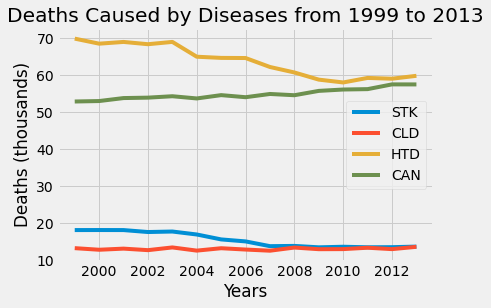

In [283]:
# solution here
four_killers = cleaned_causes_by_year[['STK','CLD','HTD','CAN']]/1000
plt.plot(four_killers)
plt.xlabel('Years')
plt.ylabel('Deaths (thousands)')
plt.title('Deaths Caused by Diseases from 1999 to 2013')
plt.legend(['STK','CLD','HTD','CAN'])